<a href="https://colab.research.google.com/github/antovila/tratamentoSRAG_AM/blob/main/C%C3%B3pia_de_TCC_SAUDE_DIGITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***INICIANDO COLETA DADOS PARA ANALISE EM SAUDE DIGITAL - TCC ***

In [1]:
#AQUI COLOCA O CAMINHO DA BASE
#sites onde ocorreram os downloads das bases 
#SRAG : https://dados.gov.br/dataset/bd-srag-2020
#CNES : https://cnes.datasus.gov.br/pages/downloads/arquivosBaseDados.jsp

caminho='/content/drive/MyDrive/colab/baseTCC/INFLUD20-28-02-2022.csv'
caminho_CNES='/content/drive/MyDrive/colab/baseTCC/tbEstabelecimento202202.csv'

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**base : tipo dataframe refere-se a base normal SRAG** 
**base_CNES : tipo dataframe contendo informacoes dos esabelecimentos**

In [2]:
import pandas as pd
base = pd.read_csv(caminho, sep=';')
base_CNES = pd.read_csv(caminho_CNES,sep=';')
base['DT_NOTIFIC']=pd.to_datetime(base['DT_NOTIFIC'])
base['DT_EVOLUCA']=pd.to_datetime(base['DT_EVOLUCA'])
base['DT_SIN_PRI']=pd.to_datetime(base['DT_SIN_PRI'])
base['DT_RES']=pd.to_datetime(base['DT_RES'],errors='coerce')
base['DT_INTERNA']=pd.to_datetime(base['DT_INTERNA'],errors='coerce')

base['DT_ENTUTI']=pd.to_datetime(base['DT_ENTUTI'],errors='coerce')
base['DT_SAIDUTI']=pd.to_datetime(base['DT_SAIDUTI'])
base['DT_RAIOX']=pd.to_datetime(base['DT_RAIOX'],errors='coerce')
base['DT_PCR']=pd.to_datetime(base['DT_PCR'])
base['DT_COLETA']=pd.to_datetime(base['DT_COLETA'],errors='coerce')
base['DT_ENCERRA']=pd.to_datetime(base['DT_ENCERRA'])
base['DT_DIGITA']=pd.to_datetime(base['DT_DIGITA'])
base['CLASSI_FIN']=pd.to_numeric(base['CLASSI_FIN'])
base_CNES['CO_NATUREZA_JUR']=pd.to_numeric(base_CNES['CO_NATUREZA_JUR'])
debugBASE = 0
debug_mortos_covid_brasil = 0
debugFILTRO2020 = 0
#AM_casos = 0
#morte_AM_total = 0
#morte_AM_total_publico = 0
#morte_AM_total_privado = 0

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,36,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**base_2020_SRAG: tipo dataframe refere-se a base filtrada apenas pro ano de 2020 na data de evolução(todos que evoluiram pra morte em 2020**

In [7]:
debugBASE = base.shape[0]
base_2020_SRAG = base[(base['DT_EVOLUCA']>="2020-01-01")&(base['DT_EVOLUCA']<="2020-12-31")&(base['SG_UF_NOT']=="AM")&(base['CLASSI_FIN']==5)&(base['EVOLUCAO']==2)]
#base_2020_SRAG[['DT_NOTIFIC','DT_SIN_PRI','DT_INTERNA','DT_ENTUTI','DT_SAIDUTI','DT_RAIOX','DT_COLETA','DT_PCR','DT_EVOLUCA','DT_ENCERRA','DT_DIGITA','DT_VGM','DT_RT_VGM','DT_TOMO','DT_RES_AN','DT_CO_SOR','DT_RES']]
base_2020_SRAG.to_csv('/content/drive/MyDrive/colab/baseTCC/div_base2020_AM_MORTOS_COVID.csv')
base_2020_SRAG[['DT_INTERNA','DT_ENTUTI','DT_SAIDUTI','DT_RAIOX','DT_COLETA','DT_PCR','DT_EVOLUCA','DT_ENCERRA','DT_RES']]
#base_2020_SRAG['DT_NOTIFIC'].isna().sum()

,DT_INTERNA,DT_ENTUTI,DT_SAIDUTI,DT_RAIOX,DT_COLETA,DT_PCR,DT_EVOLUCA,DT_ENCERRA,DT_RES
244,2020-04-21,2020-04-21,2020-04-28,NaT,2020-04-21,2020-01-05,2020-04-28,2020-01-05,NaT
299,2020-12-04,2020-12-04,2020-05-05,NaT,2020-04-13,NaT,2020-05-05,2020-10-06,NaT
355,2020-04-24,NaT,NaT,NaT,NaT,NaT,2020-04-26,2020-05-27,NaT
407,2020-04-19,NaT,NaT,NaT,NaT,NaT,2020-04-19,2020-08-17,NaT
443,2020-01-05,NaT,NaT,NaT,NaT,NaT,2020-01-05,2020-07-05,NaT
...,...,...,...,...,...,...,...,...,...
1197690,NaT,NaT,NaT,NaT,2020-07-27,2020-07-30,2020-07-27,2020-01-12,NaT
1198417,2020-12-18,2020-12-18,2020-12-23,2020-12-17,NaT,2020-12-19,2020-12-23,2020-12-24,NaT
1198927,2020-08-20,2020-09-21,2020-11-13,NaT,2020-08-20,NaT,2020-11-14,2020-11-16,2020-08-20
1198966,NaT,NaT,NaT,NaT,2020-06-10,2020-07-10,2020-06-10,2020-10-16,NaT


In [8]:
from numpy import NaN
#funcoes
#FUNCAO QUE DETECTA INCONSISTENCIA COMPARANDO DATAS INFERIORES AO PRIMEIRO OBITO NO AMAZONAS NA DATA DE EVOLUCAO
# E CORRIGE A DATA DE EVOLUCAO DO REGISTRO DO PACIENTE COM OUTRA DATA POSSIVEL DENTRO DO REGISTRO
from datetime import datetime
def f(row):  
  if row['DT_EVOLUCA']< datetime(year=2020, month=3, day=24):
    if (row['DT_PCR']!='')and(row['DT_PCR']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_PCR']
    elif (row['DT_COLETA']!='')and(row['DT_COLETA']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_COLETA']
    elif (row['DT_RAIOX']!='')and(row['DT_RAIOX']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_RAIOX']
    elif (row['DT_SAIDUTI']!='')and(row['DT_SAIDUTI']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_SAIDUTI']
    elif (row['DT_ENTUTI']!='')and(row['DT_ENTUTI']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_ENTUTI']
    elif (row['DT_INTERNA']!='')and(row['DT_INTERNA']> datetime(year=2020, month=3, day=24)) :
      row['DT_EVOLUCA']= row['DT_INTERNA']
    elif (row['DT_ENCERRA']!='')and(row['DT_ENCERRA']> datetime(year=2020, month=3, day=24))and (row['DT_ENCERRA']<=datetime(year=2020,month=12,day=31)) :
        row['DT_EVOLUCA']= row['DT_ENCERRA']
    elif (row['DT_SIN_PRI']!='')and(row['DT_SIN_PRI']> datetime(year=2020, month=3, day=24))and (row['DT_SIN_PRI']<=datetime(year=2020,month=12,day=31)) :
        row['DT_EVOLUCA']= row['DT_SIN_PRI']
    elif (row['DT_DIGITA']!='')and(row['DT_DIGITA']> datetime(year=2020, month=3, day=24))and (row['DT_DIGITA']<=datetime(year=2020,month=12,day=31)) :
        row['DT_EVOLUCA']= row['DT_DIGITA']
    elif (row['DT_RES']!='')and(row['DT_RES']> datetime(year=2020, month=3, day=24))and (row['DT_RES']<=datetime(year=2020,month=12,day=31)) :
        row['DT_EVOLUCA']= row['DT_RES']
    else:
       row['DT_EVOLUCA'] = NaN
       
  return row

base_2020_SRAG = base_2020_SRAG.apply(f,axis=1)
#REMOVE LINHAS QUE NAO FOI POSSIVEL CORRIGIR
base_2020_SRAG.dropna(subset = ["DT_EVOLUCA"], inplace=True) 

#IMPRIME SRAG PARA COMPARAR AS NOVAS DATAS
#base_2020_SRAG[['DT_INTERNA','DT_ENTUTI','DT_SAIDUTI','DT_RAIOX','DT_COLETA','DT_PCR','DT_EVOLUCA','DT_ENCERRA','DT_RES']]

#função que compara as bases de SRAG e CNES para resgatar Natureza Jurídica(base_CNES['CO_CNES']) e inserir em SRAG
def det_niveldep(cnes):
  nume = 0
  base_CNES_AM = base_CNES[base_CNES['CO_CNES']==cnes]
  nume = base_CNES_AM['CO_NATUREZA_JUR'].iat[0]
  return nume
base_2020_SRAG['CO_NATUREZA_JUR'] = base_2020_SRAG['CO_UNI_NOT'].apply(lambda x : det_niveldep(x))

# salva nova base para CSV 
#base_2020_SRAG.to_csv('/content/drive/MyDrive/colab/baseTCC/div_base_corrigida2020_FILTRO.csv')

In [9]:
base_2020_SRAG.shape[0]

5419

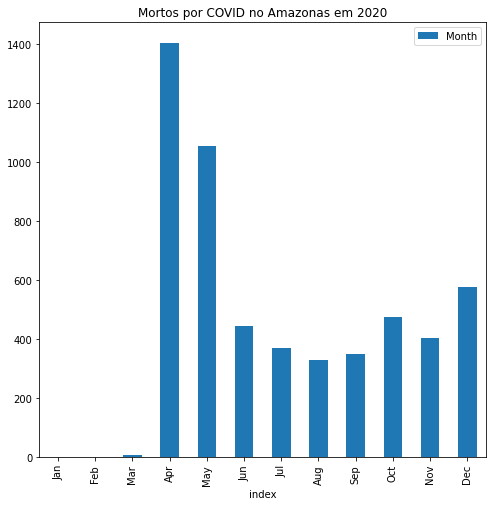

In [10]:
#mortos por covid no amazonas (MESES CORRIGIDOS)
import calendar
base_2020_SRAG['Month'] = base_2020_SRAG['DT_EVOLUCA'].dt.month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = base_2020_SRAG['Month'].astype(int).apply(lambda x: calendar.month_abbr[x]).value_counts().reset_index()
temp.set_index('index', inplace=True)
temp = temp.reindex(index=months)
wykres = temp.plot(kind='bar', figsize=(8,8), title="Mortos por COVID no Amazonas em 2020")

In [11]:
#CONTA MORTES POR MUNICIPIO
top_MUN_SRAG = base_2020_SRAG.groupby(by='ID_MUNICIP').size().sort_values(ascending=False)
top_MUN_SRAG.value_counts

<bound method IndexOpsMixin.value_counts of ID_MUNICIP
MANAUS                       4053
COARI                         133
MANACAPURU                    123
TEFE                          119
PARINTINS                      99
ITACOATIARA                    72
TABATINGA                      67
SAO GABRIEL DA CACHOEIRA       51
MAUES                          49
BENJAMIN CONSTANT              44
HUMAITA                        38
LABREA                         36
SANTO ANTONIO DO ICA           33
SAO PAULO DE OLIVENCA          32
AUTAZES                        26
IRANDUBA                       23
FONTE BOA                      22
BARCELOS                       22
PRESIDENTE FIGUEIREDO          19
BORBA                          19
CARAUARI                       18
TONANTINS                      17
JUTAI                          16
SANTA ISABEL DO RIO NEGRO      15
GUAJARA                        15
NOVA OLINDA DO NORTE           15
BOCA DO ACRE                   15
ALVARAES                   

In [12]:
#FILTRADO BASE AMAZONAS PARA SOMENTE MUNICIPIO DE MANAUS
BASE_2020_SRAG_MANAUS= base_2020_SRAG[base_2020_SRAG['ID_MUNICIP']=='MANAUS']
BASE_2020_SRAG_MANAUS.to_csv('/content/drive/MyDrive/colab/baseTCC/div_base_corrigida2020_MANAUS_FILTRO.csv')

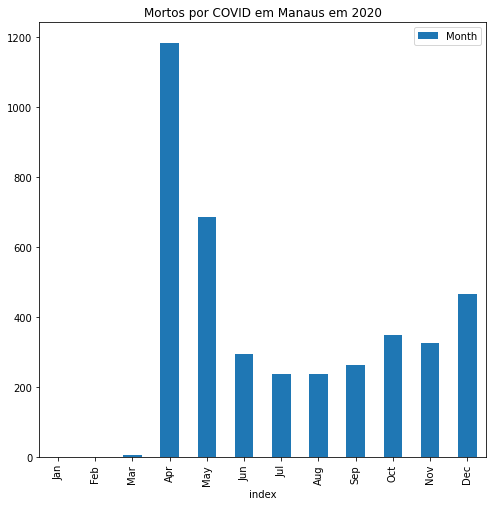

In [13]:
#GRAFICO MANAUS
import calendar
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = BASE_2020_SRAG_MANAUS['Month'].astype(int).apply(lambda x: calendar.month_abbr[x]).value_counts().reset_index()
temp.set_index('index', inplace=True)
temp = temp.reindex(index=months)
wykres = temp.plot(kind='bar', figsize=(8,8), title="Mortos por COVID em Manaus em 2020")

In [14]:
#MANAUS MORTES HOSPITAIS PUBLICOS
#SEPARAR BASE PUBLICA
# 1023.0	publico | 2062.0	sociedade empresa limitada | 2054.0	sociedade anonima fechada | 1031.0	publico municipal
# 3999.0	associacao privada | 1147.0	funcadao estadual | 1015.0	publico federal | 2011.0	empresa publica | 2143.0	cooperativa
base_2020_SRAG_AM_COVID_MORTE_PUBLICO = BASE_2020_SRAG_MANAUS.query('CO_NATUREZA_JUR ==2011 | CO_NATUREZA_JUR ==1023| CO_NATUREZA_JUR ==1236| CO_NATUREZA_JUR ==1031| CO_NATUREZA_JUR ==1147| CO_NATUREZA_JUR ==1015' )
base_2020_SRAG_AM_COVID_MORTE_PUBLICO.shape[0]

3274

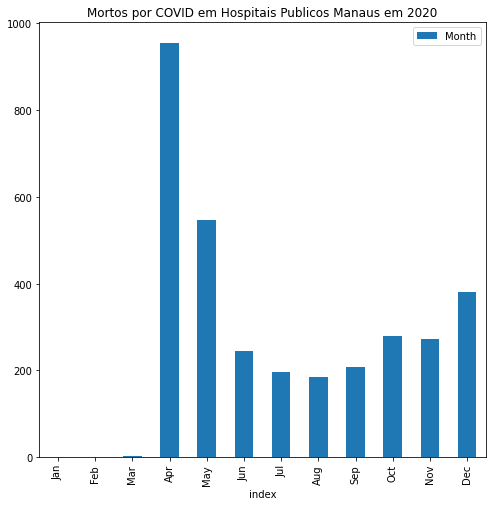

In [15]:
#GRAFICO MANAUS HOSPITAIS PUBLICOS
import calendar
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = base_2020_SRAG_AM_COVID_MORTE_PUBLICO['Month'].astype(int).apply(lambda x: calendar.month_abbr[x]).value_counts().reset_index()
temp.set_index('index', inplace=True)
temp = temp.reindex(index=months)
wykres = temp.plot(kind='bar', figsize=(8,8), title="Mortos por COVID em Hospitais Publicos Manaus em 2020")

In [16]:
# MANAUS MORTES HOSPITAIS PRIVADOS
base_2020_SRAG_AM_COVID_MORTE_PRIVADO = BASE_2020_SRAG_MANAUS.query('CO_NATUREZA_JUR !=2011 & CO_NATUREZA_JUR !=1023& CO_NATUREZA_JUR !=1236 & CO_NATUREZA_JUR !=1031 & CO_NATUREZA_JUR !=1147 & CO_NATUREZA_JUR !=1015' )
base_2020_SRAG_AM_COVID_MORTE_PRIVADO.shape[0]

779

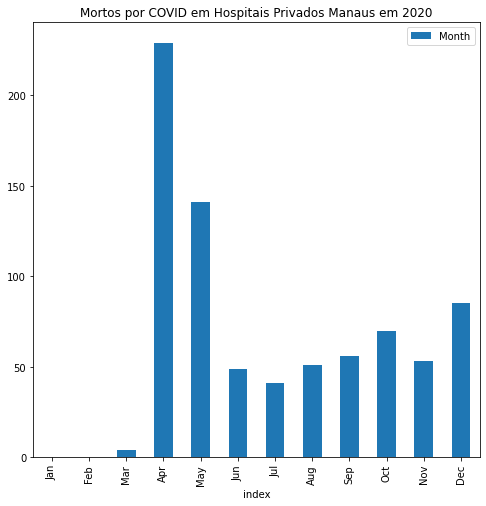

In [17]:
#GRAFICO MANAUS HOSPITAIS PUBLICOS
import calendar
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = base_2020_SRAG_AM_COVID_MORTE_PRIVADO['Month'].astype(int).apply(lambda x: calendar.month_abbr[x]).value_counts().reset_index()
temp.set_index('index', inplace=True)
temp = temp.reindex(index=months)
wykres = temp.plot(kind='bar', figsize=(8,8), title="Mortos por COVID em Hospitais Privados Manaus em 2020")